In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # Add parent directory to path

In [19]:
import h5py
import numpy as np
from tensorflow.keras import utils
import pandas as pd

# Galaxy10 dataset (17736 images)
# ├── Class 0 (1081 images): Disturbed Galaxies
# ├── Class 1 (1853 images): Merging Galaxies
# ├── Class 2 (2645 images): Round Smooth Galaxies
# ├── Class 3 (2027 images): In-between Round Smooth Galaxies
# ├── Class 4 ( 334 images): Cigar Shaped Smooth Galaxies
# ├── Class 5 (2043 images): Barred Spiral Galaxies
# ├── Class 6 (1829 images): Unbarred Tight Spiral Galaxies
# ├── Class 7 (2628 images): Unbarred Loose Spiral Galaxies
# ├── Class 8 (1423 images): Edge-on Galaxies without Bulge
# └── Class 9 (1873 images): Edge-on Galaxies with Bulge

# To get the images and labels from file
with h5py.File('../../data/raw/Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# To convert to desirable type
labels = labels.astype(np.uint8)
images = images.astype(np.uint8)

df = pd.DataFrame({'images': list(images), 'labels': list(labels)})
df['label'] = df['labels'].apply(lambda x: np.argmax(x))
df = df[['images', 'label']]

In [5]:
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
label_counts

,label,count
0,2,2645
1,7,2628
2,5,2043
3,3,2027
4,9,1873
5,1,1853
6,6,1829
7,8,1423
8,0,1081
9,4,334


In [17]:
df_grouped = df.groupby('label').apply(lambda x: x.sample(20, random_state=42)).reset_index(drop=True)
label_counts_grouped = df_grouped['label'].value_counts().reset_index()
label_counts_grouped.columns = ['label', 'count']
label_counts_grouped

/var/folders/jd/f_tz2t411v14427qk6ggvkfw0000gn/T/ipykernel_51493/4290187396.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df.groupby('label').apply(lambda x: x.sample(20, random_state=42)).reset_index(drop=True)


,label,count
0,0,20
1,1,20
2,2,20
3,3,20
4,4,20
5,5,20
6,6,20
7,7,20
8,8,20
9,9,20


In [20]:
from PIL import Image
import os

def save_images(df, output_dir):
    for index, row in df.iterrows():
        img = Image.fromarray(row['images'])
        label = row['label']
        img.save(f"{output_dir}/image_{index}_label_{label}.png")

output_directory = '../../data/raw/galaxy10_decals'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

save_images(df_grouped, output_directory)

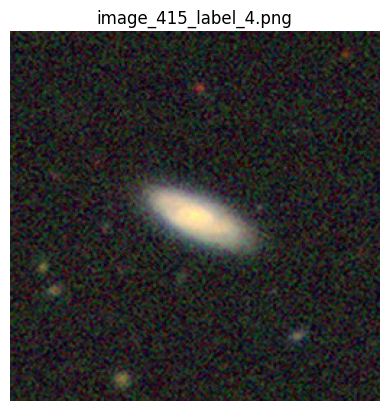

In [13]:
import matplotlib.pyplot as plt
import os

image = np.random.choice(os.listdir(output_directory))
img_path = os.path.join(output_directory, image)

img = Image.open(img_path)
plt.imshow(img)
plt.title(image)
plt.axis('off')
plt.show()